__ANALYSING THE PAST DATA__

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
np.set_printoptions(precision=4,suppress=True)

In [2]:
sp_returns=np.loadtxt('C:/Users/aheed/Desktop/spreturns.csv', delimiter=",",usecols=1)

In [3]:
sp_returns

array([ 0.0012, -0.0061,  0.0022, ...,  0.0086, -0.0012,  0.0085])

In [4]:
sp_returns.size

3019

In [14]:
sp_returns.mean()

0.000267148957332019

In [9]:
sp_returns.std()

0.012484905249216954

In [10]:
x=np.linspace(-.1,.01,1000)

In [15]:
y=stats.norm.pdf(x,loc=sp_returns.mean(),scale=sp_returns.std())

Text(0.5, 1.0, 'Normality pf sp 500 daily returns')

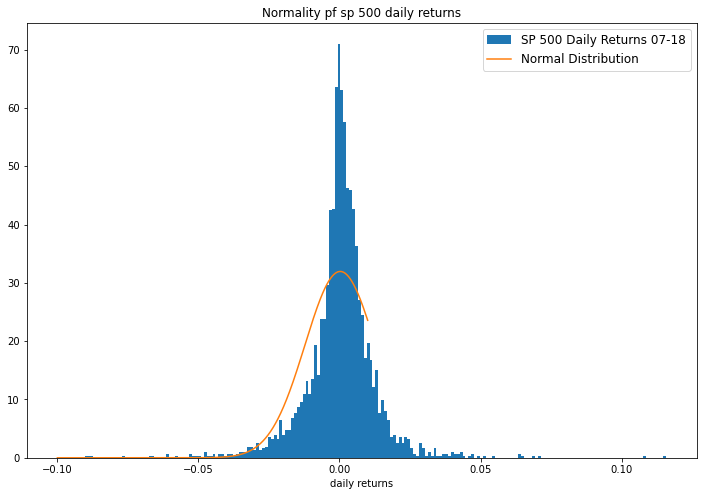

In [16]:
plt.figure(figsize=(12,8))
plt.hist(sp_returns,density=True,bins=200,label='SP 500 Daily Returns 07-18')
plt.plot(x,y,label='Normal Distribution')
plt.legend(fontsize=12)
plt.xlabel('daily returns')
plt.title('Normality pf sp 500 daily returns')

In [17]:
stats.skew(sp_returns)

-0.11775154454078195

left skewed distribution

In [18]:
stats.skewtest(sp_returns)

SkewtestResult(statistic=-2.6388253414879306, pvalue=0.008319383050798986)

reject null skew diff from zero

In [20]:
stats.kurtosis(sp_returns)

10.901383580974628

 kurtosis value of 10.9 suggests a highly leptokurtic distribution. This indicates that the distribution has heavy tails and may have more extreme values or a more pronounced peak compared to a normal distribution

In [21]:
stats.kurtosistest(sp_returns)

KurtosistestResult(statistic=23.721394870015782, pvalue=2.169130089232272e-124)

fat tailed and not normally distributed

In [22]:
stats.normaltest(sp_returns)

NormaltestResult(statistic=569.66797376209, pvalue=1.9868781741023174e-124)

small p value means not normally distributed

# VAR PARAMETRIC METHOD

paramteric assumes a normality of return but stock returns dont follow normal distribution

The Investment Fund ABC currently has a __1,000,000 USD__ position in the __S&P 500 Index__. The Risk Manager of the Fund wants to estimate the __tail risk__ (extreme negative outcomes) of this position based on __historical data__ (and forecasts).<br><br>Calculate the __minimum loss__ over a __one-day period__ that will occur with __1%__ probability: __1% Value-at-Risk (VaR) of 1,000,000 USD over a one-day period__. Use the __parametric method__.

In [23]:
sp_returns

array([ 0.0012, -0.0061,  0.0022, ...,  0.0086, -0.0012,  0.0085])

__1% var of 1 million over 1day period:__ 

In [27]:
initial=1000000
probability=0.01

In [25]:
mean=sp_returns.mean()

In [26]:
std=sp_returns.std()

In [29]:
stats.norm.ppf(q=probability,loc=mean,scale=std)*initial

-28777.083826785176

__1% Daily var is 28,777 USD__

__ __

___USING DAILY MEAN OF 0%___

In [31]:
stats.norm.ppf(q=probability,loc=0,scale=std)*initial

-29044.232784117194

__1% daily var is 29044 USD__

common practice to use 0 as mean

__ __

__Using mean return forecast__

In [34]:
annual=-0.05
#assume a -5% return for sp that year

In [35]:
daily=(1+annual)**(1/252)-1

In [36]:
stats.norm.ppf(q=probability,loc=daily,scale=std)*initial

-29247.7568892742

__1% daily var is 29247 USD__

__ __

# VaR USING HISTORICAL METHOD

The Investment Fund ABC currently has a __1,000,000 USD__ position in the __S&P 500 Index__. The Risk Manager of the Fund wants to estimate the __tail risk__ (extreme negative outcomes) of this position based on __historical data__ (and forecasts).<br><br>Calculate the __minimum loss__ over a __one-day period__ that will occur with __1%__ probability: __1% Value-at-Risk (VaR) of 1,000,000 USD over a one-day period__. Use the __historical method__.

__1% of VaR using historical method:__

In [37]:
sp_returns

array([ 0.0012, -0.0061,  0.0022, ...,  0.0086, -0.0012,  0.0085])

In [39]:
initial

1000000

In [40]:
probability

0.01

Text(0.5, 1.0, 'sp 500 daily returns')

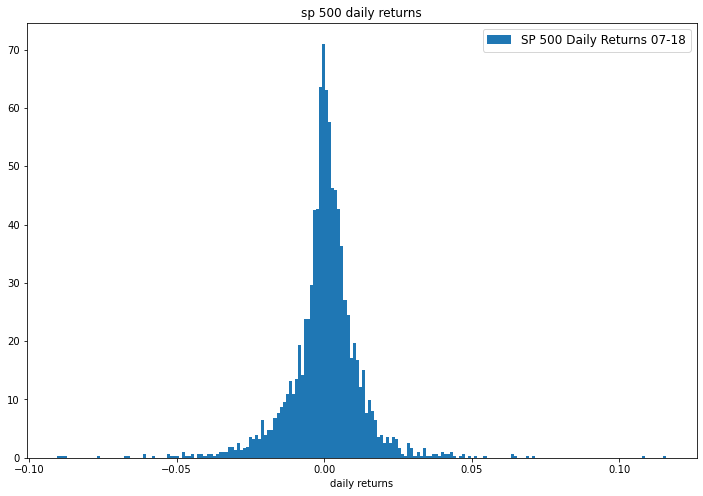

In [42]:
plt.figure(figsize=(12,8))
plt.hist(sp_returns,density=True,bins=200,label='SP 500 Daily Returns 07-18')
plt.legend(fontsize=12)
plt.xlabel('daily returns')
plt.title('sp 500 daily returns')

In [43]:
np.percentile(sp_returns,probability*100)

-0.037385006376324616

we want data that lies below 99% of values so we calculate first percentile

In [45]:
var_h=np.percentile(sp_returns,probability*100)*initial
var_h

-37385.006376324614

__daily VaR for our porfolio at 1% is 37.3k USD__